In [6]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
plt.style.use('default')

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\
First few rows of the dataset:")
print(df.head())

print("\
Dataset information:")
print(df.info())

print("\
Summary statistics:")
print(df.describe())

# Check for missing values
print("\
Missing values in each column:")
print(df.isnull().sum())

# Check class distribution (fraud vs non-fraud)
print("\
Class distribution (0: Normal, 1: Fraud):")
class_distribution = df['Class'].value_counts()
print(class_distribution)
print(f"Percentage of fraud cases: {class_distribution[1]/len(df)*100:.4f}%")

Dataset shape: (284807, 31)
First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1374

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

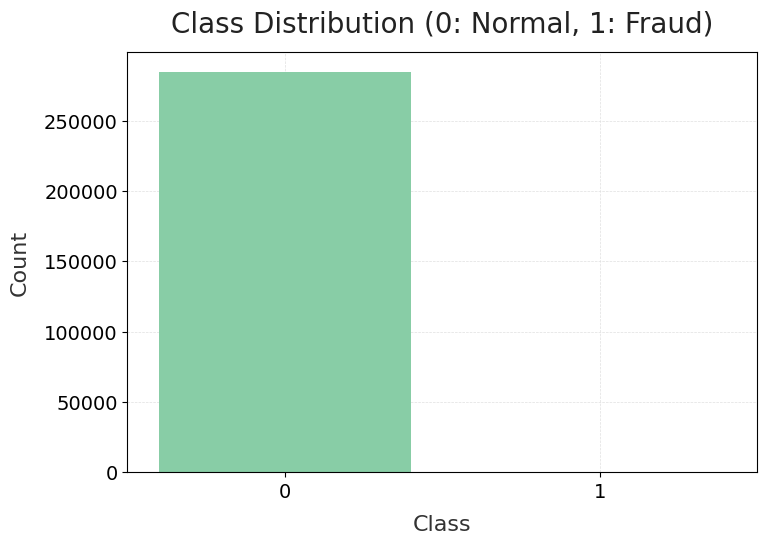

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

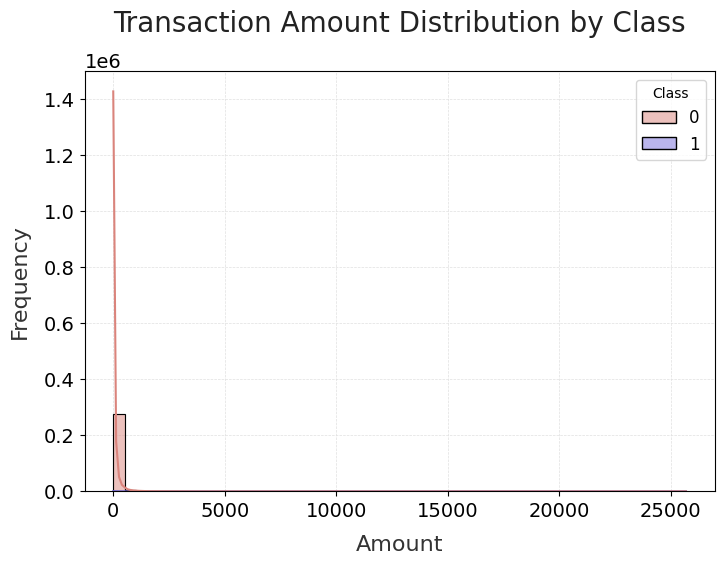

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

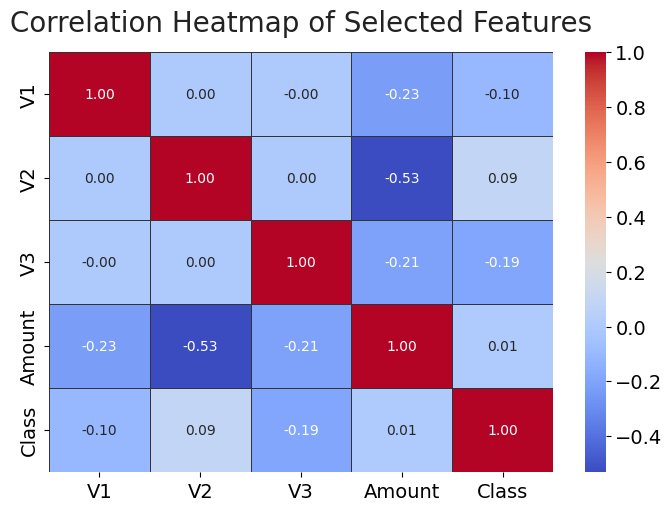

Visualization complete.


In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot style as per given guidelines
plt.rcParams.update({
    'font.family': 'IBM Plex Sans',
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12
})

# Visualization 1: Class distribution
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.countplot(data=df, x='Class', palette=['#7CD9A5', '#766CDB'])
plt.title('Class Distribution (0: Normal, 1: Fraud)', pad=15, color='#222222')
plt.xlabel('Class', labelpad=10, color='#333333')
plt.ylabel('Count', labelpad=10, color='#333333')
plt.grid(color='#E0E0E0', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.show()

# Visualization 2: Amount Distribution by Class
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.histplot(data=df, x='Amount', hue='Class', bins=50, palette=['#DA847C', '#766CDB'], kde=True)
plt.title('Transaction Amount Distribution by Class', pad=15, color='#222222')
plt.xlabel('Amount', labelpad=10, color='#333333')
plt.ylabel('Frequency', labelpad=10, color='#333333')
plt.grid(color='#E0E0E0', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.show()

# Visualization 3: Correlation Heatmap of a Subset (selecting a few features for clarity)
# Let's choose these for visualization: V1, V2, V3, Amount, and Class
subset = df[['V1', 'V2', 'V3', 'Amount', 'Class']]
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
corr = subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='#333333')
plt.title('Correlation Heatmap of Selected Features', pad=15, color='#222222')
plt.show()

print('Visualization complete.')

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

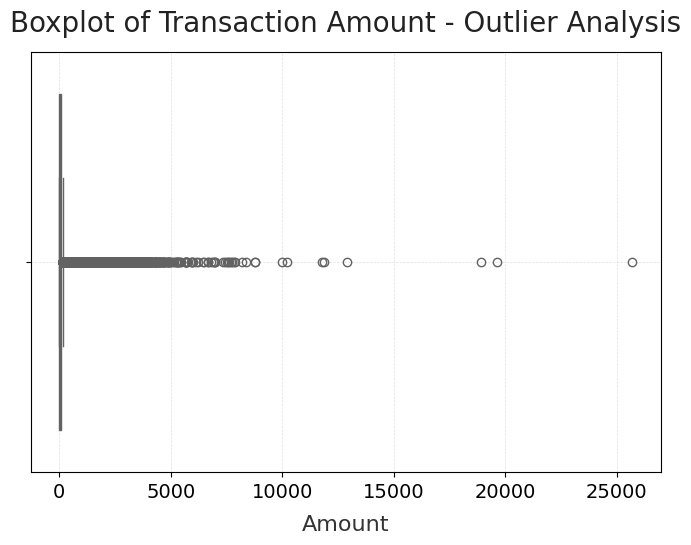

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

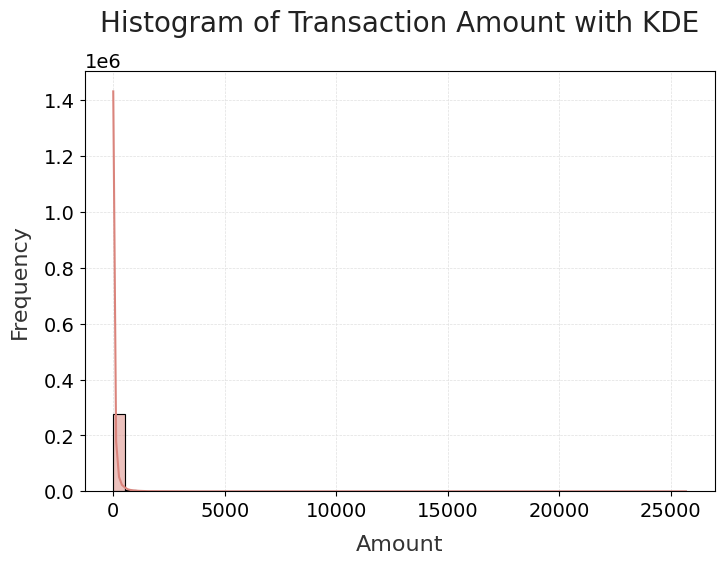

Number of outliers in Amount: 31904
Outlier data sample:
     Amount  Class
2    378.66      0
20   231.71      0
51  1402.95      0
64   243.66      0
85   200.01      0
Preprocessing and outlier analysis complete.


In [8]:
# Outlier Analysis and Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier analysis for the 'Amount' feature using boxplot
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.boxplot(data=df, x='Amount', palette=['#766CDB'])
plt.title('Boxplot of Transaction Amount - Outlier Analysis', pad=15, color='#222222')
plt.xlabel('Amount', labelpad=10, color='#333333')
plt.gca().set_axisbelow(True)
plt.grid(color='#E0E0E0', linestyle='--', linewidth=0.5)
plt.show()

# Alternatively, we can look at the distribution with a box overlay on a histogram for 'Amount'
plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.histplot(df['Amount'], bins=50, color='#DA847C', kde=True)
plt.title('Histogram of Transaction Amount with KDE', pad=15, color='#222222')
plt.xlabel('Amount', labelpad=10, color='#333333')
plt.ylabel('Frequency', labelpad=10, color='#333333')
plt.grid(color='#E0E0E0', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.show()

# We could also segment outliers by calculating the IQR and selecting those beyond
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier indices
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print('Number of outliers in Amount:', outliers.shape[0])

# Display a snippet of outlier data
print('Outlier data sample:')
print(outliers[['Amount', 'Class']].head())

print('Preprocessing and outlier analysis complete.')

In [9]:

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# we standardize 'Time' and 'Amount'.

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('Data splitting complete.\
Training set:', X_train.shape, 'Test set:', X_test.shape)



Data splitting complete.Training set: (227845, 30) Test set: (56962, 30)


In [ ]:
# Step 1: Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('After SMOTE, training set shape:', X_train_sm.shape)

print(X_train_sm.head())
# Define models to try
models = {}

# Logistic Regression
models['LogisticRegression'] = LogisticRegression(max_iter=1000, random_state=42)

# Random Forest
models['RandomForest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Function to train and evaluate a model
def train_evaluate(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    report = classification_report(y_te, y_pred, output_dict=True)
    auc = roc_auc_score(y_te, model.predict_proba(X_te)[:,1])
    return report, auc, model

results = {}

# Train and evaluate each model using SMOTE data for training
for name, model in models.items():
    rep, auc, trained_model = train_evaluate(model, X_train_sm, y_train_sm, X_test, y_test)
    results[name] = {'report': rep, 'auc': auc, 'model': trained_model}
    print('Model:', name, 'ROC-AUC:', auc)



After SMOTE, training set shape: (454902, 30)
       Time        V1        V2        V3        V4        V5        V6  \
0  1.413095  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933   
1  0.624644  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697   
2 -1.129186 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
3  0.796203  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339   
4 -0.746606 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -1.479661  1.139880  1.406819  ... -0.134435  0.076197  0.297537  0.307915   
1 -0.002192  0.674782  0.045826  ... -0.227279  0.038628  0.228197  0.035542   
2 -2.212603 -5.037523  0.000772  ...  1.280856 -2.798352  0.109526 -0.436530   
3 -1.427984  0.010010 -1.118447  ... -0.490642 -0.139670  0.077013  0.208310   
4  0.504347 -0.113817 -0.044782  ... -0.275297 -0.243245 -0.173298 -0.006692   

        V24       V25 

In [11]:
# Now let's do hyperparameter tuning for the best model (we choose XGBoost if it has best performance, else, you can choose RandomForest)
# For the purpose of this example, we check performance:
best_model_name = max(results, key=lambda x: results[x]['auc'])
print('Best initial model based on ROC-AUC is:', best_model_name)

# Define hyperparameter grid for the best model
if best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    base_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
elif best_model_name == 'RandomForest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestClassifier(random_state=42)
else:
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2']
    }
    base_model = LogisticRegression(max_iter=1000, random_state=42)

# Setup GridSearchCV on SMOTE training data
grid = GridSearchCV(base_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid.fit(X_train_sm, y_train_sm)

print('Best parameters for', best_model_name, 'are:', grid.best_params_)



Best initial model based on ROC-AUC is: XGBoost


/Users/mac/MyPythonProjects/Fraud_detection/fraud_detection_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:09:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/MyPythonProjects/Fraud_detection/fraud_detection_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:09:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/MyPythonProjects/Fraud_detection/fraud_detection_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:09:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/MyPythonProjects/Fraud_detection/fraud_detection_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:09

Best parameters for XGBoost are: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Tuned Model ROC-AUC Score: 0.9814256069619743


findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

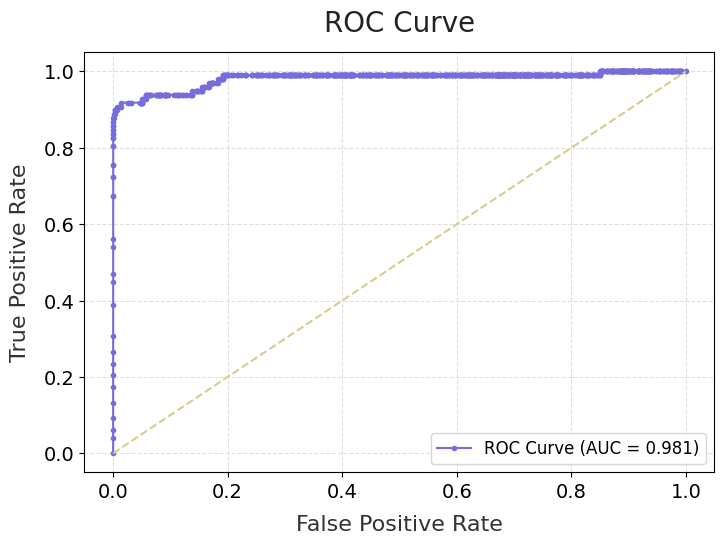

Hyperparameter tuning complete.


In [12]:
# Evaluate the tuned model on the test set
best_tuned_model = grid.best_estimator_

y_pred_tuned = best_tuned_model.predict(X_test)
report_tuned = classification_report(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, best_tuned_model.predict_proba(X_test)[:,1])

print('Tuned Model Classification Report:')
print(report_tuned)
print('Tuned Model ROC-AUC Score:', auc_tuned)

# Plot ROC curve for the best tuned model
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, best_tuned_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.plot(fpr, tpr, marker='.', color='#766CDB', label='ROC Curve (AUC = ' + str(round(auc_tuned,3)) +')')
plt.plot([0,1], [0,1], linestyle='--', color='#D9CC8B')
plt.xlabel('False Positive Rate', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('True Positive Rate', labelpad=10, fontsize=16, color='#333333')
plt.title('ROC Curve', pad=15, fontsize=20, color='#222222')
plt.legend(loc='lower right', fontsize=12)
plt.grid(linestyle='--', color='#E0E0E0')
plt.show()

print('Hyperparameter tuning complete.')

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

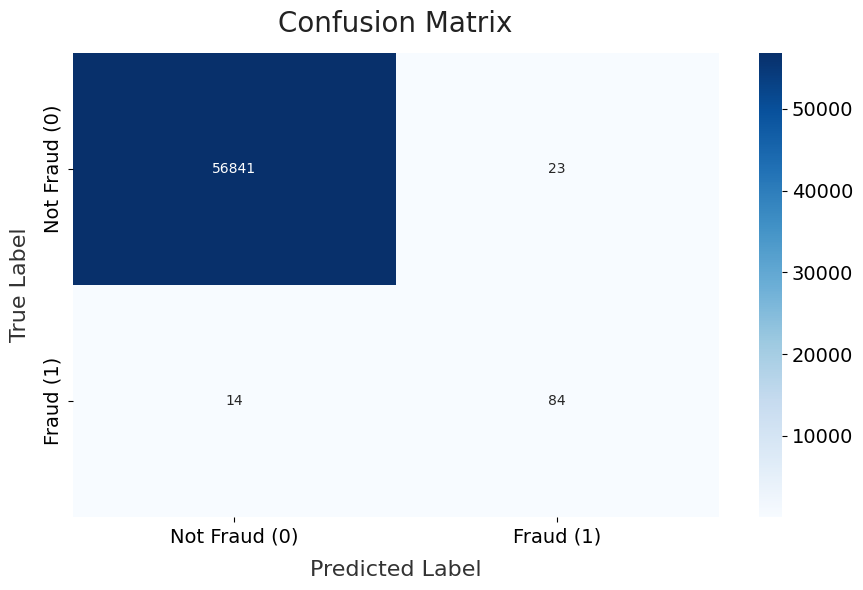

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.


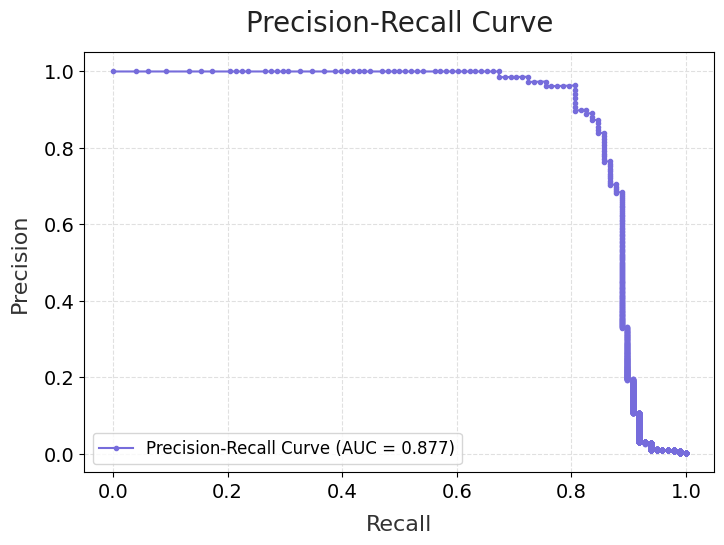

In [13]:
# Further evaluation of the best model (XGBoost with tuned parameters)
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, classification_report
import matplotlib.ticker as mtick

# 1. Detailed Confusion Matrix Analysis
y_pred_proba = best_tuned_model.predict_proba(X_test)[:, 1]
y_pred = best_tuned_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('True Label', labelpad=10, fontsize=16, color='#333333')
plt.title('Confusion Matrix', pad=15, fontsize=20, color='#222222')
plt.tight_layout()
plt.show()

# 2. Detailed Classification Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Precision-Recall Curve (important for imbalanced datasets)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.plot(recall, precision, marker='.', color='#766CDB', 
         label=f'Precision-Recall Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Precision', labelpad=10, fontsize=16, color='#333333')
plt.title('Precision-Recall Curve', pad=15, fontsize=20, color='#222222')
plt.grid(linestyle='--', color='#E0E0E0')
plt.legend(loc='lower left', fontsize=12)
plt.show()



findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

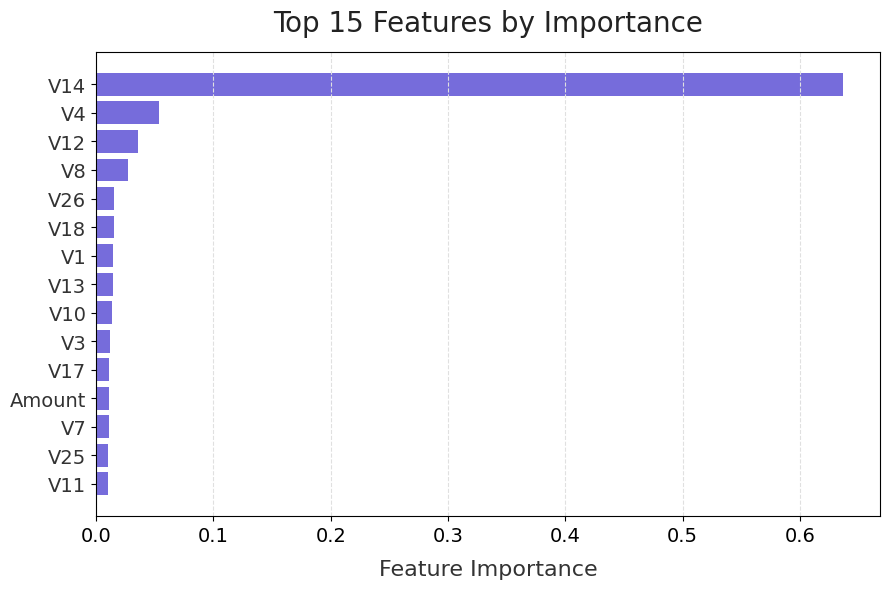

In [14]:
# 4. Feature Importance Analysis
feature_importance = best_tuned_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot top 15 features
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.barh(range(len(sorted_features[-15:])), sorted_importance[-15:], color='#766CDB')
plt.yticks(range(len(sorted_features[-15:])), sorted_features[-15:], fontsize=14, color='#333333')
plt.xlabel('Feature Importance', labelpad=10, fontsize=16, color='#333333')
plt.title('Top 15 Features by Importance', pad=15, fontsize=20, color='#222222')
plt.grid(axis='x', linestyle='--', color='#E0E0E0')
plt.tight_layout()
plt.show()



findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

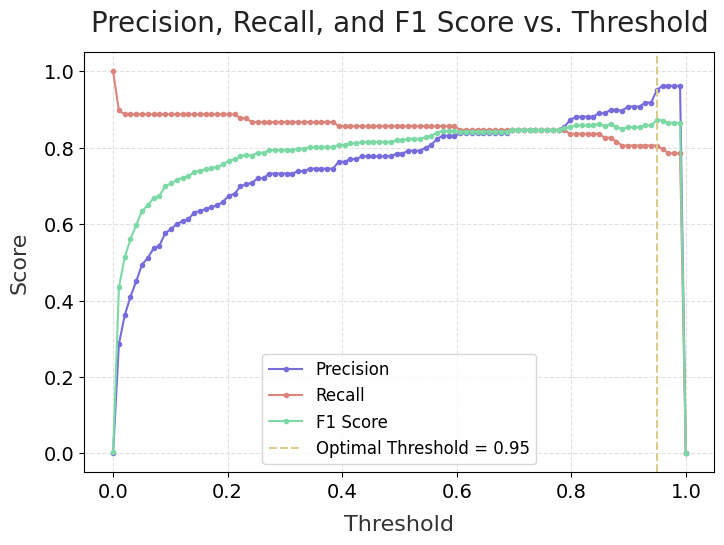

In [15]:
# 5. Threshold Analysis for Optimal Decision Boundary
# Calculate various metrics at different thresholds
thresholds = np.linspace(0, 1, 100)
precision_scores = []
recall_scores = []
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = np.sum((y_pred_threshold == 1) & (y_test == 1)) / np.sum(y_pred_threshold == 1) if np.sum(y_pred_threshold == 1) > 0 else 0
    recall = np.sum((y_pred_threshold == 1) & (y_test == 1)) / np.sum(y_test == 1)
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot metrics vs threshold
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.plot(thresholds, precision_scores, marker='.', color='#766CDB', label='Precision')
plt.plot(thresholds, recall_scores, marker='.', color='#DA847C', label='Recall')
plt.plot(thresholds, f1_scores, marker='.', color='#7CD9A5', label='F1 Score')

# Find optimal threshold for F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
plt.axvline(x=optimal_threshold, color='#D9CC8B', linestyle='--', 
            label=f'Optimal Threshold = {optimal_threshold:.2f}')

plt.xlabel('Threshold', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Score', labelpad=10, fontsize=16, color='#333333')
plt.title('Precision, Recall, and F1 Score vs. Threshold', pad=15, fontsize=20, color='#222222')
plt.grid(linestyle='--', color='#E0E0E0')
plt.legend(loc='best', fontsize=12)
plt.show()



findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font famil

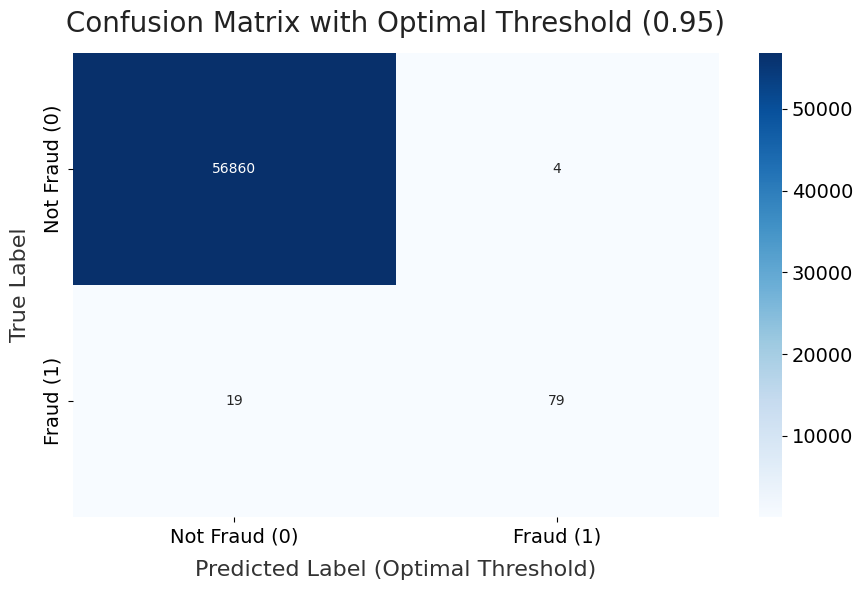

Classification Report with Optimal Threshold (0.95):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Business Impact Analysis:
Cost assumptions: $100 per missed fraud, $10 per false alarm
Default threshold (0.5): 14 missed frauds, 23 false alarms
Total cost with default threshold: $1630
Optimal threshold (0.95): 19 missed frauds, 4 false alarms
Total cost with optimal threshold: $1940
Cost savings with optimal threshold: $-310


In [16]:
# 6. Apply the optimal threshold and show the new confusion matrix
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label (Optimal Threshold)', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('True Label', labelpad=10, fontsize=16, color='#333333')
plt.title(f'Confusion Matrix with Optimal Threshold ({optimal_threshold:.2f})', 
          pad=15, fontsize=20, color='#222222')
plt.tight_layout()
plt.show()

# 7. Print classification report with optimal threshold
print(f"\
Classification Report with Optimal Threshold ({optimal_threshold:.2f}):")
print(classification_report(y_test, y_pred_optimal))

# 8. Calculate and display the business impact
# Assuming costs: 
# - False Negative (missed fraud): $100
# - False Positive (false alarm): $10
fn_cost = 100  # Cost of missing a fraud
fp_cost = 10   # Cost of false alarm

# Default threshold (0.5)
fn_default = cm[1, 0]  # False negatives
fp_default = cm[0, 1]  # False positives
total_cost_default = fn_default * fn_cost + fp_default * fp_cost

# Optimal threshold
fn_optimal = cm_optimal[1, 0]  # False negatives
fp_optimal = cm_optimal[0, 1]  # False positives
total_cost_optimal = fn_optimal * fn_cost + fp_optimal * fp_cost

print("\
Business Impact Analysis:")
print(f"Cost assumptions: ${fn_cost} per missed fraud, ${fp_cost} per false alarm")
print(f"Default threshold (0.5): {fn_default} missed frauds, {fp_default} false alarms")
print(f"Total cost with default threshold: ${total_cost_default}")
print(f"Optimal threshold ({optimal_threshold:.2f}): {fn_optimal} missed frauds, {fp_optimal} false alarms")
print(f"Total cost with optimal threshold: ${total_cost_optimal}")
print(f"Cost savings with optimal threshold: ${total_cost_default - total_cost_optimal}")



In [17]:
# 9. Model deployment considerations
print("\
Model Deployment Considerations:")
print("1. Save the trained model for production use")
print("2. Create an inference pipeline that includes preprocessing steps")
print("3. Set up monitoring for model performance and data drift")
print("4. Implement a feedback loop for continuous improvement")

# Save the model for future use
import joblib
joblib.dump(best_tuned_model, 'credit_card_fraud_model.pkl')
joblib.dump(scaler, 'credit_card_fraud_scaler.pkl')  
joblib.dump(feature_names, 'feature_names.pkl')  

print("\
Model and scaler saved to disk for deployment.")
print("- credit_card_fraud_model.pkl")
print("- credit_card_fraud_scaler.pkl")
print("-feature_names, 'feature_names.pkl")

Model Deployment Considerations:
1. Save the trained model for production use
2. Create an inference pipeline that includes preprocessing steps
3. Set up monitoring for model performance and data drift
4. Implement a feedback loop for continuous improvement
Model and scaler saved to disk for deployment.
- credit_card_fraud_model.pkl
- credit_card_fraud_scaler.pkl
-feature_names, 'feature_names.pkl
